**Import all the dependencies**

In [28]:
import tkinter as tk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [40]:
# Create the main window
root = tk.Tk()
root.title("Customer Segmentation")

''

Data Collection and Analysis

In [30]:
data_extract = pd.read_csv(r'C:\Users\HP\Downloads\Ml Projects\Customer Segmentation Analyzer\Mall_Customers.csv')


In [31]:
data_extract.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


info regarding no of rows and colums

In [32]:
data_extract.shape

(200, 5)

In [33]:
data_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Checking for the missing values

In [34]:
data_extract.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Select annual income and expected spending columns

In [35]:
X = data_extract.iloc[:,[3,4]].values

In [36]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

we will calculate for the WCSS value. that is the Elbow method

In [37]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


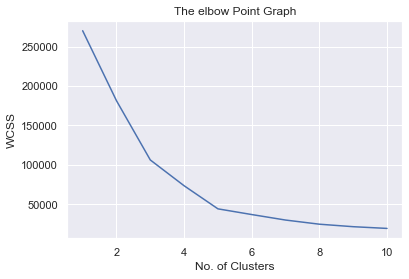

In [38]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The elbow Point Graph")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.show()

we found out by elbow point that 5 is the optimal value 

Train the kmeans model

here we will get which data point belongs to which particular cluster


No. of clusters - 5 i.e 0, 1, 2, 3, 4

Now we will Plot the clusters along with their Centroids

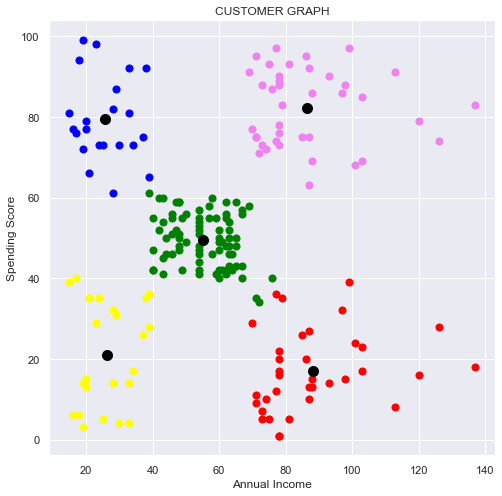

In [41]:
# Define the function to show the cluster plot
def show_cluster_plot():
    kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
    Y = kmeans.fit_predict(X)
    
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c="green", label="Cluster 1")
    plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c="red", label="Cluster 2")
    plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c="yellow", label="Cluster 3")
    plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s=50, c="blue", label="Cluster 4")
    plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s=50, c="violet", label="Cluster 5")

    # Plot the centroids
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')

    plt.title('CUSTOMER GRAPH')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    
    # Create a Tkinter canvas to embed the plot
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    
    # Clear the existing canvas and pack the new one
    plot_canvas.delete("all")
    canvas.get_tk_widget().pack(in_=plot_canvas, fill=tk.BOTH, expand=True)

# Create a frame to hold the plot canvas
plot_frame = tk.Frame(root)
plot_frame.pack(pady=10)

# Create a canvas within the frame to embed the plot
plot_canvas = tk.Canvas(plot_frame)
plot_canvas.pack(fill=tk.BOTH, expand=True)

# Create a button to show the cluster plot
plot_button = tk.Button(root, text="Show Cluster Plot", command=show_cluster_plot)
plot_button.pack(pady=10)

# Create a button to exit the application
exit_button = tk.Button(root, text="Exit", command=root.destroy)
exit_button.pack()

# Run the main event loop
root.mainloop()